In [11]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [12]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Genre']=le.fit_transform(dataset['Genre'])

In [16]:
X = dataset[['Genre','Age','Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [17]:
from sklearn.cluster import KMeans

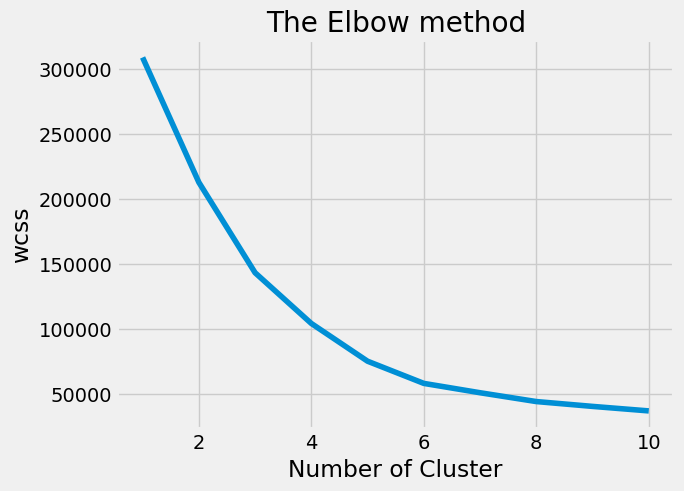

In [18]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0,)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show()

In [19]:
kmeans = KMeans(n_clusters= 5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans

KMeans(n_clusters=5, n_init=10, random_state=0)

In [20]:
y_kmeans = kmeans.fit_predict(X)

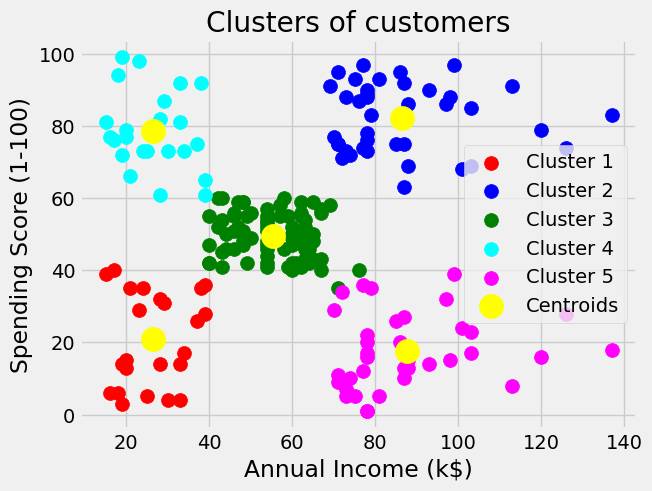

In [25]:
plt.scatter(X.iloc[y_kmeans == 0, 2], X.iloc[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 2], X.iloc[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 2], X.iloc[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 2], X.iloc[y_kmeans == 3, 3], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4, 2], X.iloc[y_kmeans == 4, 3], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
